# Random Forests

## Introduction:
    


This tutorial will give you an insight of the concept of Random Forests, how to use them and when to use them. I assume that the readers have the basic knowledge of decision trees. Random Forest is a supervised machine learning algorithm, it is used for classification as well as regression. We will see the implementation for a classification problem. It is one of the goto methods for data scientists in classification problems. Also, random forests perform well even without paramter tuning. Decision trees suﬀer from high variance. This means that if we change the training data even little, the decision trees change alot. Bootstrap aggregation, or bagging, is a general-purpose procedure for reducing the bagging variance of a statistical learning method; it is particularly useful and frequently used in the context of decision trees. 

In bagging, we bootstrap, by taking repeated samples from the (single) training data set. In this approach we generate B diﬀerent bootstrapped training data sets. We then train our model on the bth bootstrapped training set and average all the predictions. Random forests provide an improvement over bagged trees by decorrelating the trees. In this technique, we build a number of decision trees on bootstrapped training samples. But when building these decision trees, each time a split in a tree is considered, a random sample of say m predictors is chosen as split candidates from the full set of p predictors. The split is allowed to use only one of those m predictors. Thus, this ensures the randomness, and decreases the variance. 


### Installing the libraries:

Before getting started, you need to install graphviz library which is used to visualize the decsion tree. You can install it using:

$ pip install graphviz  

or

$conda install graphviz

### Libraries:

In [122]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import collections
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.tree import export_graphviz
import graphviz
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report

### Dataset Description:

For this tutorial, we will be using wine dataset available in sklearn library. It is hosted in the UCI machine learning repository https://archive.ics.uci.edu/ml/datasets/wine . It contains chemical analysis of the content of wines grown in the same region in Italy, but derived from three different cultivars. The instances are classified into three classes: 1, 2 and 3.

### Loading and exploring dataset

In [2]:
##loading wine data from sklearn with features and target variable
data = load_wine()

target = data.target
features = data.data

##Let us look at the size of the data
print(features.shape)
## There are 13 features and 178 rows

##Let us check for the target classes
print(np.unique(target))
print(collections.Counter(target))
## Here we have 71 in class 1, 59 in class 0 and 48 in class 2


df = pd.DataFrame(features, columns=data.feature_names)
## Let us check for null values in the dataframe
print(df.isnull().values.any())
## No NULL values found

df.head()

(178, 13)
[0 1 2]
Counter({1: 71, 0: 59, 2: 48})
False


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Fitting the Model

In [3]:
# Let us split data to train and test set 30% test size
X_train, X_test, y_train, y_test = train_test_split(features, target,test_size=0.30,random_state=1000)

## Fitting the model i.e. using train data set to train the random forest
rf = RandomForestClassifier(criterion ='gini', n_estimators=100, oob_score=True, random_state=1000)
rf.fit(X_train, y_train)


##Predicting using the test data set
predicted = rf.predict(X_test)



In [4]:
print(collections.Counter(y_train))

Counter({1: 47, 0: 44, 2: 33})


Let us talk about few important parameters used for  tuning in Random forests:
1. n_estimators: it is the number of trees in the random forest. More number of trees will decrease the variance and will be good for the model.
2. oob_score: It is the out of bag error calculated on training dataset. We will dive deep into this in the following section.
3. random_state: Each time you run the random forest algorithm, the models will change, as each tree chooses predictors to split randomly. To keep the results constant every time you run the random forest using same training set, you need to set the random_state. 
4. criterion: This is the objective function on which the split is based on. It could be gini or entropy. Both of these are discused in detail in later part of the tutorial

### Feature Importance:

One of the useful features of treebased models is that it helps for feature selection in data science problems. Many a times data scientists use tree based models in feature engineering, to select the features. Feature importance is computed using the mean decrease in Gini index, and expressed relative to the maximum. 

We will use sklearn library to see the feature importanace in our model. It measures the importance by looking at how much the tree nodes, which use that feature, reduce impurity across all trees in the forest. It computes this score for each feature after training and averages across the trees in the forest. Note that this importance values lie in 0-1. Also, the sum of all the feature importances is 1. Thus, we can analyze which features contribute the most in the prediction process. Many a times, you would want to drop the features with very low importance, as it would be leading to overfitting  of the model.



Feature ranking:
1. feature: proline , importance: 0.172874
2. feature: flavanoids , importance: 0.168300
3. feature: color_intensity , importance: 0.132163
4. feature: alcohol , importance: 0.131633
5. feature: od280/od315_of_diluted_wines , importance: 0.131210
6. feature: hue , importance: 0.069135
7. feature: total_phenols , importance: 0.052826
8. feature: alcalinity_of_ash , importance: 0.036188
9. feature: magnesium , importance: 0.036119
10. feature: malic_acid , importance: 0.028318
11. feature: proanthocyanins , importance: 0.021559
12. feature: ash , importance: 0.010107
13. feature: nonflavanoid_phenols , importance: 0.009569


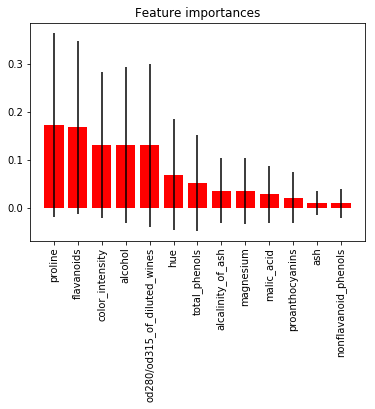

In [5]:
## Feature Importance:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


print("Feature ranking:")


sorted_features_importances =[]

for f in range(X_train.shape[1]):
    sorted_features_importances.append(data.feature_names[indices[f]])
    print("%d. feature: %s , importance: %f" % (f + 1, data.feature_names[indices[f]], importances[indices[f]]))


# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), sorted_features_importances, rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.show()

In our model, we can see that proline has the highest importance, followed by flavanoids, color_intensity, alcohol, od280/od315_of_diluted_wines. We can also see that the importance of ash, nonflavanoid_phenols is too low.

### Model Evaluation

Let us see how Random forest perform on the test data

In [6]:
##Accuracy
accuracy = accuracy_score(y_test, predicted)
print("Accurcay score is: %f" %(accuracy))

## precision recall f1score
print(classification_report(y_test, predicted, target_names= ['0','1','2']))



Accurcay score is: 0.962963
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       1.00      0.92      0.96        24
          2       0.88      1.00      0.94        15

avg / total       0.97      0.96      0.96        54



### Out Of Bag Error

Let us understand how Out of Bag Error gives an estimate of performace of Random forest. In Random forest, the trees are formed by bootstrapping the observations with replacement. Every observation is likely to be in a sample with a probability of 2/3. Which means it is used for training in approximately 2/3 of the trees, and is a part of test set for 1/3 of the trees in the random forest. Thus, each tree is trained for 2/3 of the samples and tested for 1/3 of the samples. OOB or Out of Bag error is the average of errors for the trees in which the ibservations are test set. Thus, in Random forests, we do not need to do cross-validation. This itself provides an estimate of the errors.

In [7]:
print("The Out Of Bag error is: %f"%( 1- rf.oob_score_))

The Out Of Bag error is: 0.032258


### Confusion Matrix:

Let us see how well our classifier is doing. 

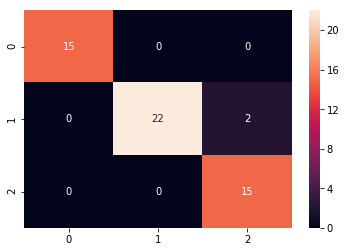

In [8]:
matrix = pd.DataFrame(confusion_matrix(y_test, predicted), columns=np.unique(target), index=np.unique(target))
sns.heatmap(matrix, annot=True)
plt.show()

In [9]:
## Let us visualize underlying decision trees:
## the following code produces .dot files for all the decion trees

i_tree = 0
class_names = np.unique(target)
print(class_names)
for tree_in_forest in rf.estimators_:
    with open('tree_' + str(i_tree) + '.dot', 'w') as trees:
        trees = tree.export_graphviz(tree_in_forest,feature_names=data.feature_names, class_names=['0','1','2'],out_file = trees)
        graph = graphviz.Source(trees)  
    i_tree = i_tree + 1


[0 1 2]


To generate the decision trees http://webgraphviz.com/ has been used.

### Gini Index and Entropy:

Let us understand how the decision trees are build. At each split, we need to consider an objective function. That is what the criterion parameter in the classifier accounts for.

Gini index:
It is the measure of probability of classifying a wrong label of a randomly chosen observation. It is 0 when all the subsets are pure or of the same class.

Gini index= 1-$\sum p^2$

Thus, when you are choosing Gini index as your criterion, you would want to minimize the gini index.

Entropy:
Entropy defines how disorgnized the data is. For example if I have a node with 50 of class 1 and 50 of class 2, it is completely disorganized having entropy of 1. On the other hand, if I have a node with 95 of class 1 and 5 of class 2, it has less entropy. Thus, splitting on the latter will be more useful. It is 0, when the data is pure.

Entropy = - p log p - q log q




To understand how a decision tree splits using gini index or entropy, let us fit a decision tree classifier and calculate the gini indexes at each split. Please note, random forest does not split on minimum gini index of all features, but it uses the minimum index considering restricted predictors. This is to produce randomness in our model. To demostarte let us fit a decision tree classifier. 

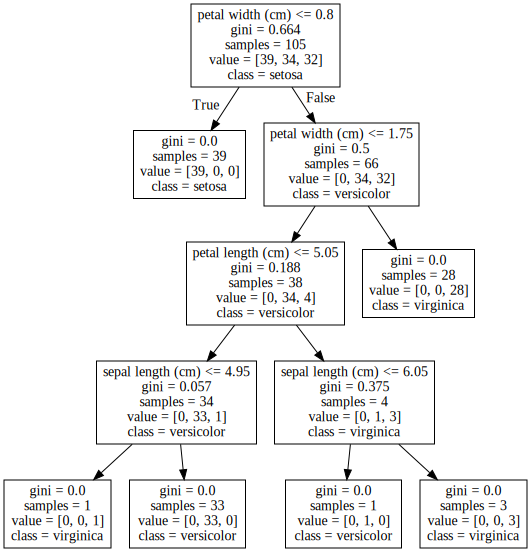

In [117]:
## we will use iris dataset to learn about splitting in decision trees:

## we need to have graphviz in the ystem path
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

decision_data = load_iris()
target = decision_data.target
features = decision_data.data

##splitting data to test and train
X_train, X_test, y_train, y_test = train_test_split(features, target,test_size=0.30,random_state=1000)

clf = tree.DecisionTreeClassifier()

##fitting the decision tree classifier
clf = clf.fit(X_train, y_train)

##predicting using the above model
clf.predict(X_test)

##using graphviz to visualize our tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=decision_data.feature_names,  
                         class_names=decision_data.target_names)  
graph = graphviz.Source(dot_data)  
graph

In [94]:
## let's fetch data of the above tree and calculate the gini index for each node
## the tree traversal is preorder, i.e. preorder

def calGini(values):
    if(len(values)==1):
        values = np.append(values,0)
        values = np.append(values,0)
    if(len(values)==2):
        values = np.append(values,0)
    total = values[0]+values[1]+values[2]

    gini = 1-((values[0]/total)**2 + (values[1]/total)**2 + (values[2]/total)**2)
    return (round(gini,3))
    
    
import re
value = re.compile(r'value =( \[[0-9, ]*\])')
values =value.findall(dot_data)

for classes in values:
    classes = classes.split(',')
    class0 = int(classes[0].strip()[1:])
    class1 = int(classes[1].strip())
    class2 = int(classes[2].strip()[:-1])
    print(calGini([class0,class1,class2]))

    




0.664
0.0
0.5
0.188
0.057
0.0
0.0
0.375
0.0
0.0
0.0


Now we know how to calculate the gini index, let us try to see what all possible splits are there at node 0:

In [121]:

split = ()
splits=[]
for row in X_train:
    i=0
    for feature in row:
        split =(float(round(feature,2)),i)
        splits.append(split)
        i=i+1

minimum_gini =10000       
for s,i in splits:
    j=0
    left_split =[]
    right_split=[]
    for row in X_train:
        if(row[i]<=s):
            left_split.append(y_train[j])
        else:
            right_split.append(y_train[j])
        j=j+1   
    left_split = np.array(left_split)
    left_values = np.bincount(left_split)
    
    right_split = np.array(right_split)
    
    if right_split.size:
        right_values = np.bincount(right_split)
    else:
        right_values =[0,0,0]
        continue
    ## Now we have splits on left and right, let us calculate gini of left and right nodes
    left_gini = calGini(left_values)
    right_gini = calGini(right_values)
   
    
   
    weighted_gini = ((np.sum(left_values)*left_gini) +  (np.sum(right_values)*right_gini))/105
    if weighted_gini<=minimum_gini:
        minimum_gini = weighted_gini
        min_left_gini = left_gini
        min_right_gini = right_gini
        min_split = (s,decision_data.feature_names[i])
        print("weighted_gini: ",minimum_gini)
        print(left_gini,right_gini)
        print(min_split)
        print(left_values)
        print(right_values)
        
        

weighted_gini:  0.569438095238
0.111 0.658
(4.9, 'sepal length (cm)')
[16  0  1]
[23 34 31]
weighted_gini:  0.446876190476
0.478 0.402
(4.5, 'petal length (cm)')
[39 22  1]
[ 0 12 31]
weighted_gini:  0.4004
0.546 0.0
(1.7, 'petal width (cm)')
[39 34  4]
[ 0  0 28]
weighted_gini:  0.32819047619
0.049 0.5
(3.0, 'petal length (cm)')
[39  1]
[ 0 33 32]
weighted_gini:  0.314285714286
0.0 0.5
(1.7, 'petal length (cm)')
[39]
[ 0 34 32]
weighted_gini:  0.314285714286
0.0 0.5
(1.7, 'petal length (cm)')
[39]
[ 0 34 32]
weighted_gini:  0.314285714286
0.0 0.5
(1.7, 'petal length (cm)')
[39]
[ 0 34 32]
weighted_gini:  0.314285714286
0.0 0.5
(0.6, 'petal width (cm)')
[39]
[ 0 34 32]


When we see the weighted gini of the above shown tree, it is around 3.14, there are multiple ways in which we can split at node 0, decision tree classifier uses greedy algorithm, thus, will choose the minimum gini index at each node split.

### Summary:

I would say Random forest is one of the easiest ensembling methods to have hands on. You can run on large datasets by training trees parallelly, and specifying n_jobs i.e. jobs to run parallelly. Also, we learnt how random forests can be used to extract important features for a model. It performs well even if the data has missing values. It takes interaction of features into consideration. You can explore more about other ways of splitting the trees i.e. with entropy, the concepts of information gain. Also, there are other baaging and boosting methods which you can explore - AdaBoost, XGBoost etc. 

### Sources and Refernces:

An Introduction to Statistical Learning - Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani

https://archive.ics.uci.edu/ml/datasets/wine

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree

https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd

https://charleshsliao.wordpress.com/2017/05/20/decision-tree-in-python-with-graphviz-to-visualize/

http://scikit-learn.org/stable/modules/tree.html#tree

https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0